/usr/local/lib/python3.7/site-packages/sklearn/mixture/base.py:273: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/mixture/base.py:273: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/mixture/base.py:273: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


[0.47480188 0.52519812]
[[ 2.14782118 -0.62828512]
 [-1.94172349  0.567997  ]]
[[[1.90809534 1.48099522]
  [1.48099522 2.90085775]]

 [[1.84384582 0.98396518]
  [0.98396518 4.54511247]]]


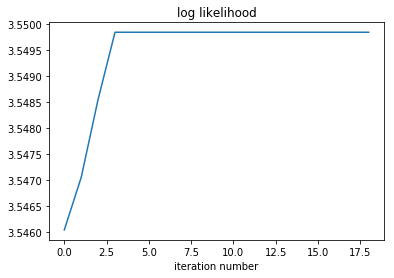

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import mixture, decomposition
from scipy.stats import multivariate_normal

np.random.seed(3)
# prepare data
mnist = np.loadtxt("data.dat")
    
label = np.loadtxt("label.dat")


# reducel feature dimension
pca=decomposition.PCA(n_components=2)
new_mnist=pca.fit_transform(mnist.T)

# def loglikelihoog 
def loglikelihoog(x,pi,mu,sigma):
    n=x.shape[0]
    c=len(pi)
    l=0
    for i in range(n):
        for j in range(c):
            p=multivariate_normal(mean=mu[j],cov=sigma[j])
            l=l+pi[j]*p.pdf(x[i,:])
    return np.log(l)

# train model and get log likelihood
def model(x,training_times=20):
    log=[]
    for i in range(1,training_times):
        clf=mixture.GaussianMixture(n_components=2,covariance_type="full",max_iter=i)
        model=clf.fit(new_mnist)
        pi=model.weights_
        mu=model.means_
        sigma=model.covariances_
        nlog=loglikelihoog(x,pi,mu,sigma)
        log.append(nlog)
    plt.plot(log)
    plt.title("log likelihood")
    plt.xlabel("iteration number")
    return pi,mu,sigma

# classify mnist
def classify(x,pi,mu,sigma):
    n=x.shape[0]
    c=len(pi)
    cla=[]
    for i in range(n):
        p=[]
        for j in range(c):
            pr=pi[j]*multivariate_normal.pdf(x[i,:],mean=mu[j],cov=sigma[j])
            p.append(pr)
        index=p.index(max(p))
        cla.append(index)
    return cla

                
pi,mu,sigma=model(new_mnist)
print(pi)
print(mu)
print(sigma)